In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from data_analysis.helpers import *

[(5,), (5, 25), (5, 50), (5, 75), (5, 100), (5, 125), (5, 150)]


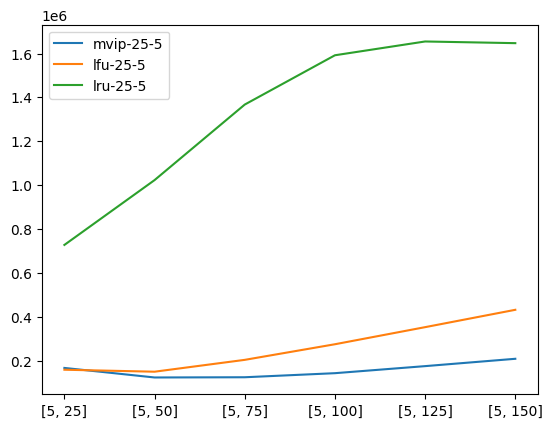

In [6]:
experiment_name = "mt_cache_size_rate"
topology = "abilene"
# config_path = "../sim_configs/" + experiment_name + "_config.json"
config_path = "https://pastebin.com/raw/19aJNE91"
db_path = "./sim_outputs/" + experiment_name + "_" + topology + "_db.json"
db = getJsonDb(db_path)


fig, ax = plt.subplots()


test_config = getTestConfig(config_path)
input_param_list = simConfigToParamSets(test_config)
filters = [("cache_pol", "mvip", None), ("cache_read_rates",(25,10),None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "delay",
)
#ax.plot([5, 6, 7, 8, 9, 10, 11], res, label="vip")
print(list(map(tuple,test_config["cache_capacities"])))
ax.plot(list(map(str,test_config["cache_capacities"][1:])), res, label="mvip-25-5")

filters = [("cache_pol", "lfu", None),  ("cache_read_rates",(25,10),None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "delay",
)
#ax.plot([5, 6, 7, 8, 9, 10, 11], res, label="lfu-25-5")
ax.plot(list(map(str,test_config["cache_capacities"][1:])), res, label="lfu-25-5")

filters = [("cache_pol", "lru", None), ("cache_read_rates",(25,10),None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "delay",
)
#ax.plot([5, 6, 7, 8, 9, 10, 11], res, label="lru")
ax.plot(list(map(str,test_config["cache_capacities"][1:])), res, label="lru-25-5")

ax.legend()

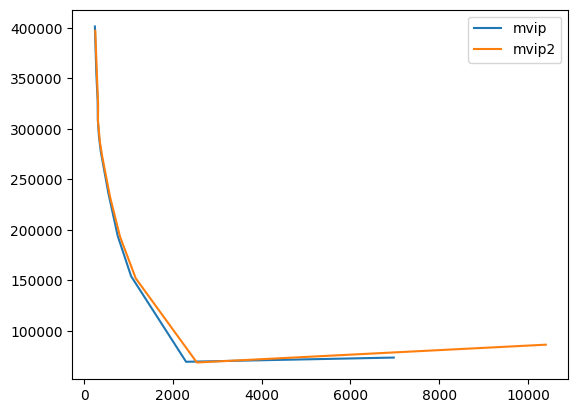

In [23]:
experiment_name = "some"
topology = "abilene"
config_path = "./sim_configs/" + experiment_name + "_config.json"
db_path = "./sim_outputs/" + experiment_name + "_" + topology + "_db.json"
db = getJsonDb(db_path)
fig, ax = plt.subplots()
test_config = getTestConfig(config_path)
input_param_list = simConfigToParamSets(test_config)

filters = [("cache_pol", "mvip", None)]
filters.extend(
    [
        ("vip_inc", 1, None),
        ("vip_slot_len", 1, None),
        ("vip_win_size", 100, None),
        ("cache_capacities", (5, 100), None),
    ]
)
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "delay",
)
rpen = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "cache_read_penalties",
)
wpen = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "cache_write_penalties",
)
ax.plot(np.sum(rpen + wpen, axis=1), res, label="mvip")
# ax.plot(rpen+wpen, res, label="vip2")
# ax.plot([0,0.25,0.5,1,2,5,10,20], res, label="vip2")

#filters = [("cache_pol", "palfu", None)]
filters = [("cache_pol", "mvip", None)]
filters.extend(
    [
        ("vip_inc", 1, None),
        ("vip_slot_len", 1, None),
        ("vip_win_size", 50, None),
        ("cache_capacities", (5, 100), None),
    ]
)
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "delay",
)
rpen = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "cache_read_penalties",
)
wpen = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "cache_write_penalties",
)
ax.plot(np.sum(rpen + wpen, axis=1), res, label="mvip2")
# ax.plot(rpen+wpen, res, label="palfu")
# ax.plot([0,0.25,0.5,1,2,5,10,20], res, label="palfu")

ax.legend()